In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def espacios ():
    #Esta función es unicamente de visulización, para facilitar la lectura
    print("\n"*2)
def sturges (data):
    #Esta función calcula el número de clases que se deben de tener en un histograma en funcion de la cantidad de datos
    n = len(data)
    k = 1 + 3.322*np.log10(n)
    return int(k)

In [3]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)
sql_connection.close()


In [4]:
#Analis preliminar de la distribución de los datos
print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [5]:
#Se visualizan las columnas 
print(data_01.columns)

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [6]:
#se genera una lista de las columnas que seran tenidas en cuenta
columnas = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       '% Iron Concentrate', '% Silica Concentrate']
data_01 = data_01[columnas]
# Cambio en el nombre de ciertas columnas para facilitar la lectura
columnas_nuevo_nombre = ['% Iron Feed', '% Silica Feed', 'Starch Flow m3/h', 'Amina Flow m3/h',
       'Ore Pulp Mass Flow Ton/h', 'Ore Pulp pH', 'Ore Pulp Density kg/L',
       '% Iron Concentrate', '% Silica Concentrate']
data_01.columns = columnas_nuevo_nombre

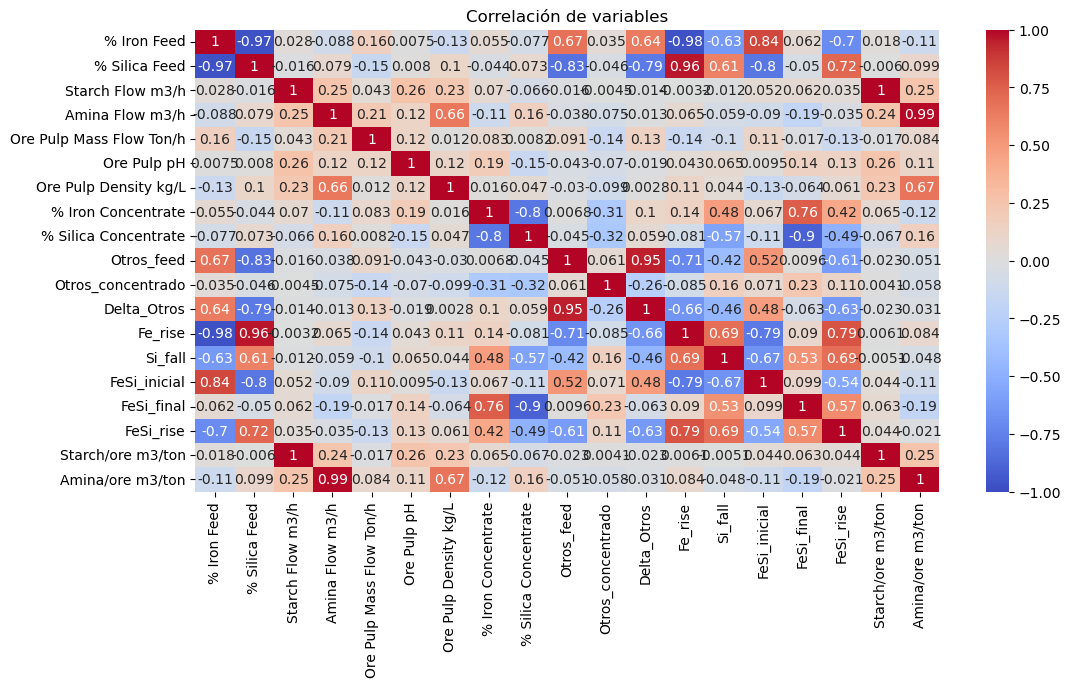

In [7]:

data_01["Otros_feed"]=100-data_01["% Iron Feed"]-data_01["% Silica Feed"]
data_01["Otros_concentrado"]=100-data_01["% Iron Concentrate"]-data_01["% Silica Concentrate"]
data_01["Delta_Otros"]=data_01["Otros_feed"]-data_01["Otros_concentrado"]
data_01["Fe_rise"] = (data_01["% Iron Concentrate"] - data_01["% Iron Feed"])/data_01["% Iron Feed"]
data_01["Si_fall"] = (data_01["% Silica Concentrate"] - data_01["% Silica Feed"])/data_01["% Silica Feed"]*-1
data_01["FeSi_inicial"]= data_01["% Iron Feed"] / data_01["% Silica Feed"]
data_01["FeSi_final"]= data_01["% Iron Concentrate"] / data_01["% Silica Concentrate"]
data_01["FeSi_rise"] = (data_01["FeSi_final"] - data_01["FeSi_inicial"])/data_01["FeSi_inicial"]
data_01["Starch/ore m3/ton"]= data_01["Starch Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]
data_01["Amina/ore m3/ton"]= data_01["Amina Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]

plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlación de variables')
plt.show()


In [51]:
columnas=data_01.columns
nombres=["% Hierro alimentación",
         "% Sílice alimentación",
         "Flujo de almidón",
         "Flujo de amina",
         "Flujo de pulpa de mineral",
         "pH de la pulpa de mineral",
         "Densidad de la pulpa de mineral",
         "% Hierro concentrado",
         "% Sílice concentrado",
         "% Otros en alimentación",
        "% Otros en concentrado",    
         "Aumento concentración de hierro",
         "Disminución concentración de sílice",
         "Relación Fe/Si inicial",
         "Relación Fe/Si final",
         "Aumento de la relación Fe/Si",
        "Relación de almidón por tonelada de mineral",
        "Relación de amina por tonelada de mineral"
         ]
dict_nombres=dict(zip(columnas,nombres))

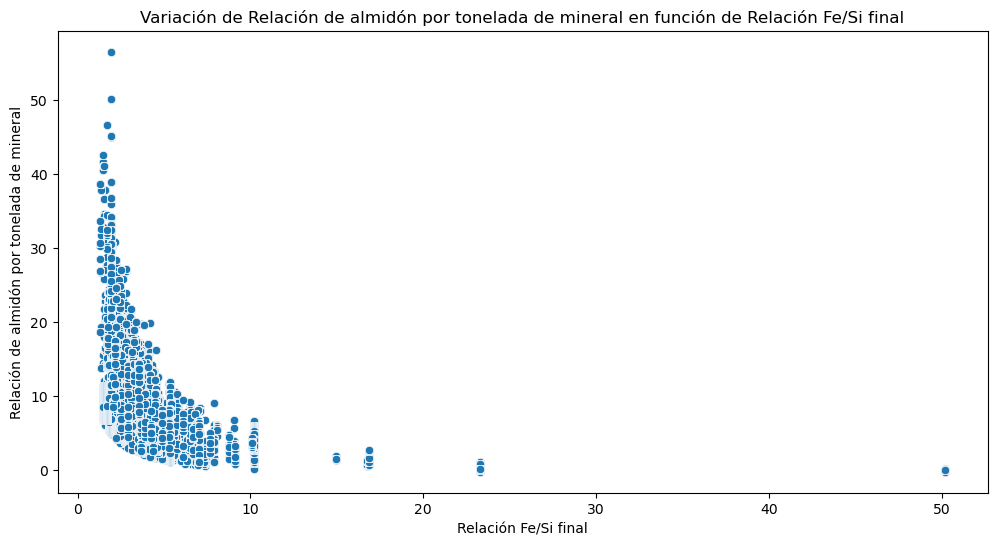

In [52]:
Variable_x="FeSi_inicial"
Variable_y="FeSi_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=Variable_x, y=Variable_y)
plt.xlabel(dict_nombres[Variable_x])
plt.ylabel(dict_nombres[Variable_y])
plt.title(f"Variación de {dict_nombres[Variable_y]} en función de {dict_nombres[Variable_x]}")
plt.show()

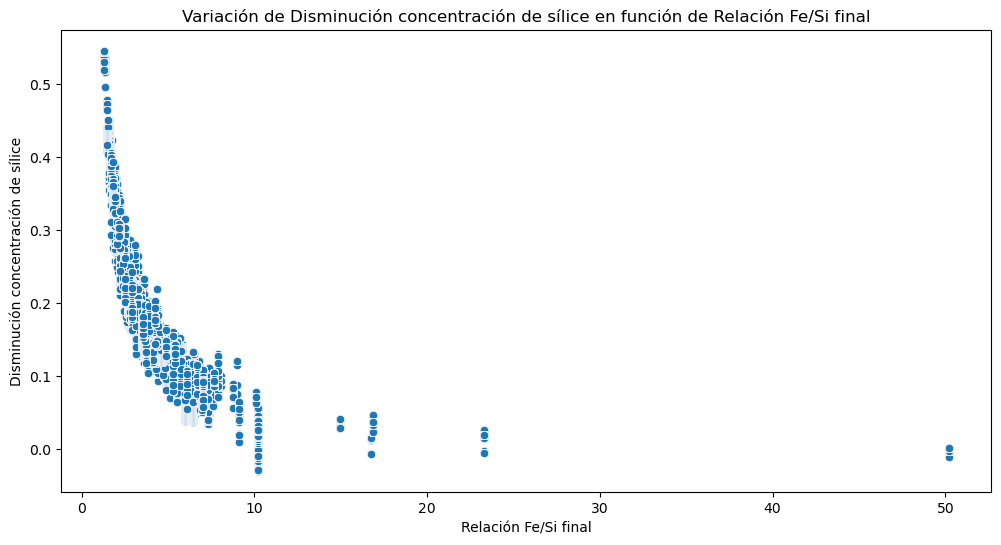

In [53]:
Variable_x="FeSi_inicial"
Variable_y="Fe_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=Variable_x, y=Variable_y)
plt.xlabel(dict_nombres[Variable_x])
plt.ylabel(dict_nombres[Variable_y])    
plt.title(f"Variación de {dict_nombres[Variable_y]} en función de {dict_nombres[Variable_x]}")
plt.show()

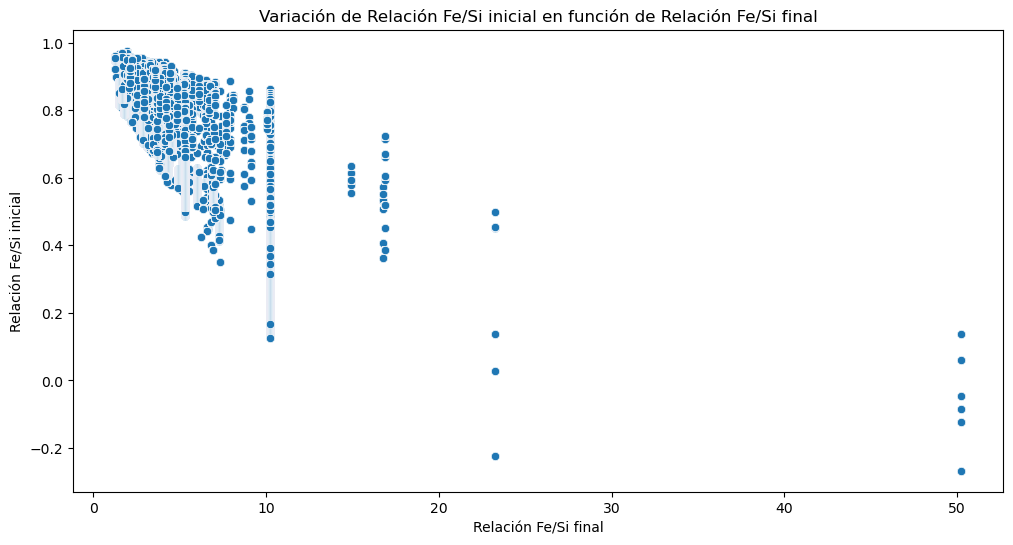

In [54]:
variable_x="FeSi_inicial"
variable_y="Si_fall"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=variable_x, y=variable_y)
plt.xlabel(dict_nombres[variable_x])
plt.ylabel(dict_nombres[variable_y])
plt.title(f"Variación de {dict_nombres[variable_y]} en función de {dict_nombres[variable_x]}")
plt.show()

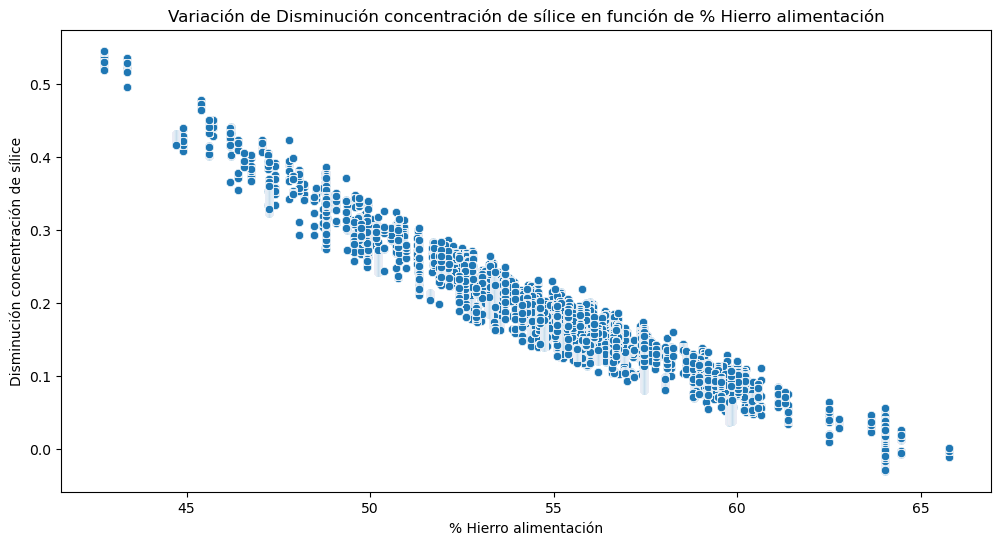

In [55]:
variable_x="% Iron Feed"
variable_y="Fe_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=variable_x, y=variable_y)
plt.xlabel(dict_nombres[variable_x])
plt.ylabel(dict_nombres[variable_y])
plt.title(f"Variación de {dict_nombres[variable_y]} en función de {dict_nombres[variable_x]}")
plt.show()

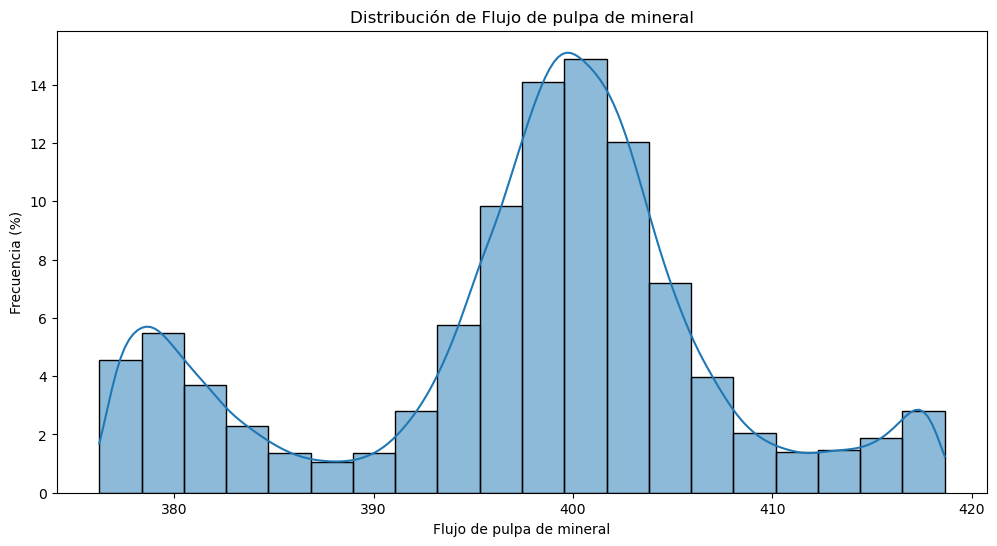

In [56]:
plt.figure(figsize=(12, 6))
data="Ore Pulp Mass Flow Ton/h"
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

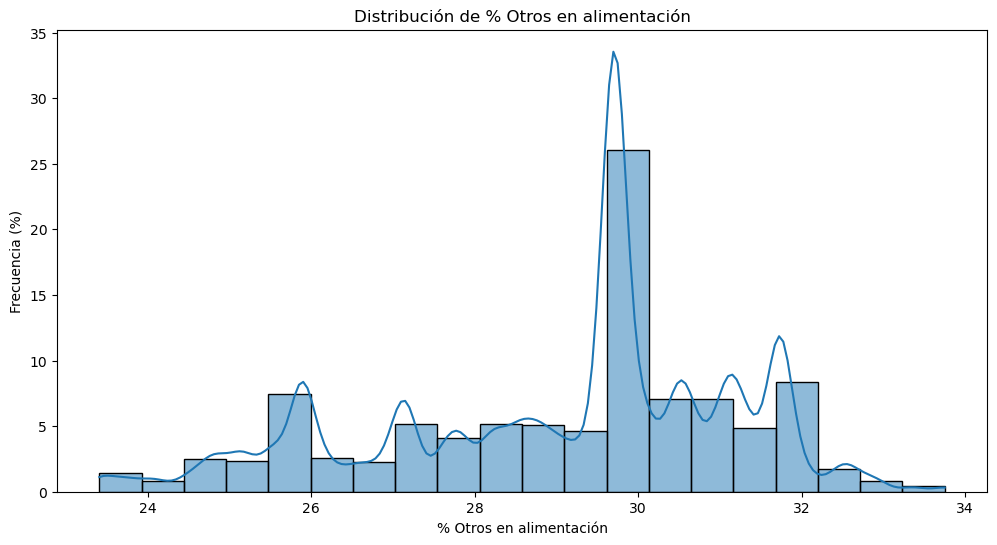

In [57]:
data="Otros_feed"
plt.figure(figsize=(12, 6))
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

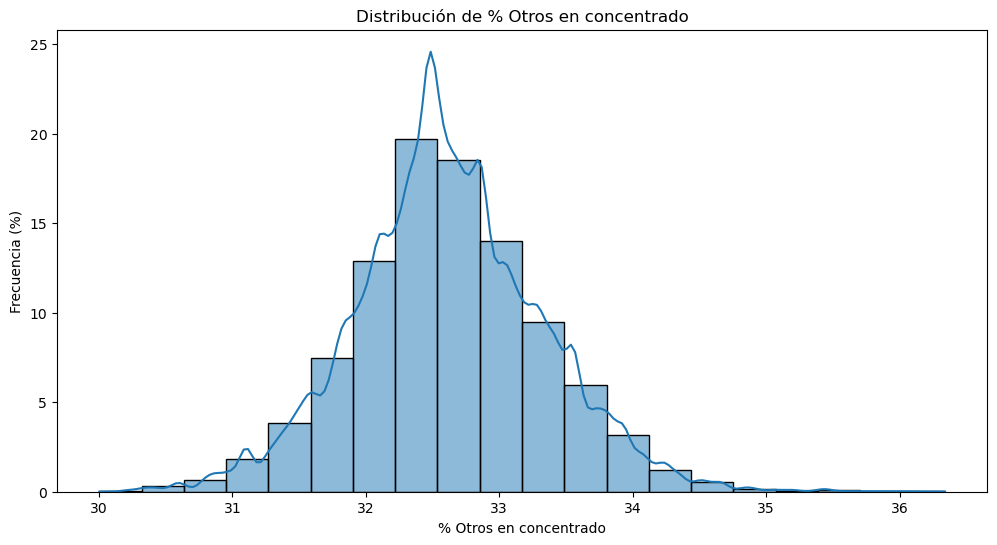

In [58]:
data="Otros_concentrado"
plt.figure(figsize=(12, 6))
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

In [59]:
# filtrado de outliers de FeSi_inicial
interquartil= data_01["FeSi_inicial"].quantile(0.75)-data_01["FeSi_inicial"].quantile(0.25)
valor_corte_inf=data_01["FeSi_inicial"].quantile(0.25)-1.5*interquartil
valor_corte_sup=data_01["FeSi_inicial"].quantile(0.75)+1.5*interquartil
data_02=data_01[(data_01["FeSi_inicial"]>valor_corte_inf) & (data_01["FeSi_inicial"]<valor_corte_sup)]


In [60]:
valor_corte=data_02["% Iron Concentrate"].quantile(0.1)
data_filtrado_1=data_02[data_02["% Iron Concentrate"]>valor_corte]
data_filtrado_2=data_02[data_02["% Iron Concentrate"]<=valor_corte]


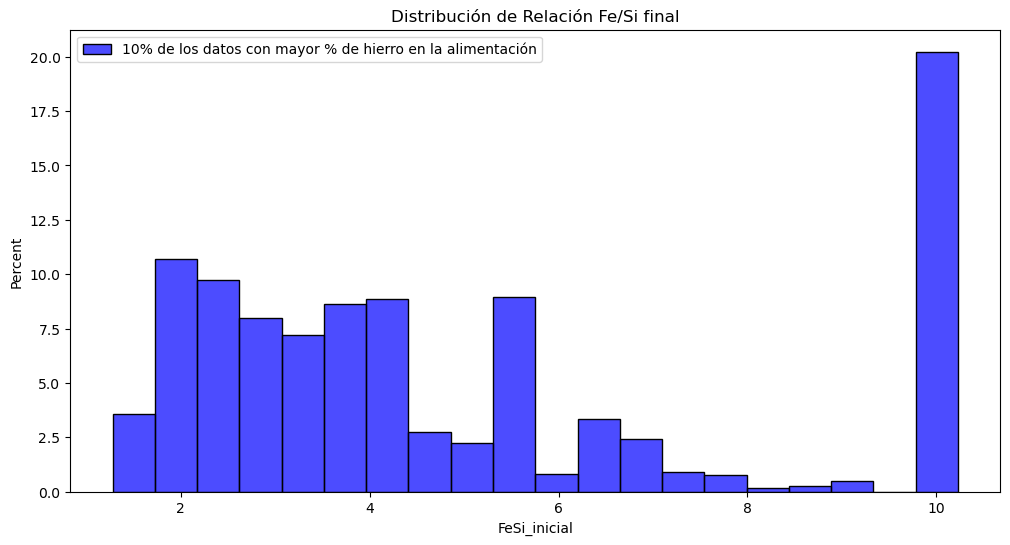

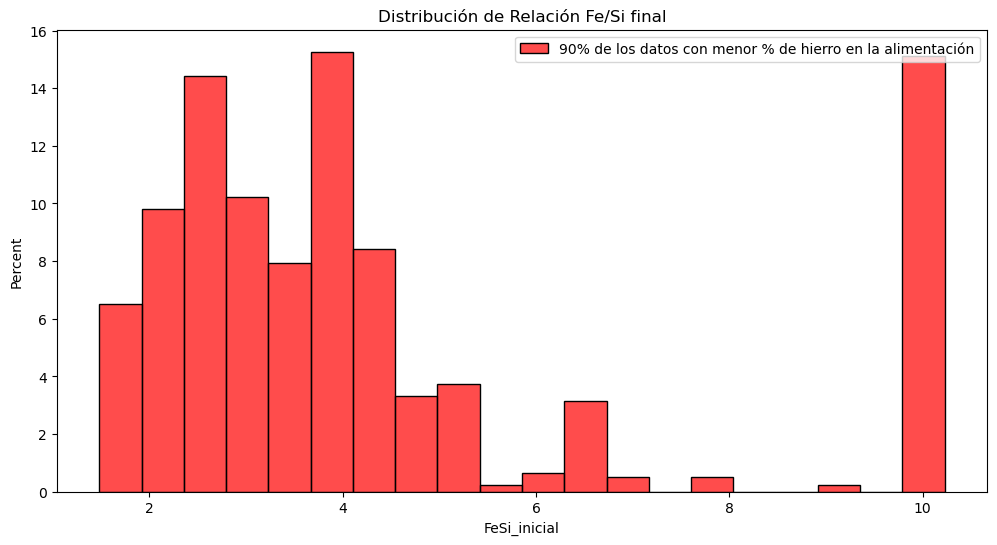

In [61]:
plt.figure(figsize=(12, 6))
variable_a_anailizar="FeSi_inicial"
sns.histplot(data=data_filtrado_1, x=variable_a_anailizar,bins=sturges(data_01[variable_a_anailizar]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="10% de los datos con mayor % de hierro en la alimentación")
plt.title(f"Distribución de {dict_nombres[variable_a_anailizar]}")
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
variable_a_anailizar="FeSi_inicial"
sns.histplot(data=data_filtrado_2, x=variable_a_anailizar,bins=sturges(data_01[variable_a_anailizar]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="90% de los datos con menor % de hierro en la alimentación")
plt.title(f"Distribución de {dict_nombres[variable_a_anailizar]}")
plt.legend()
plt.show()

In [62]:
print(data_filtrado_1.describe())
espacios()
print(data_filtrado_2.describe())

         % Iron Feed  % Silica Feed  Starch Flow m3/h  Amina Flow m3/h  \
count  657324.000000  657324.000000     657324.000000    657324.000000   
mean       56.303140      14.650151       2891.785346       486.380411   
std         5.173658       6.804846       1214.943775        91.221346   
min        42.740000       6.080000          0.002026       241.669000   
25%        52.610000       8.870000       2083.180000       430.035750   
50%        56.200000      13.540000       3052.055000       502.023000   
75%        59.720000      19.940000       3747.292500       551.977000   
max        64.030000      33.400000       6300.230000       739.538000   

       Ore Pulp Mass Flow Ton/h    Ore Pulp pH  Ore Pulp Density kg/L  \
count             657324.000000  657324.000000          657324.000000   
mean                 397.831233       9.788136               1.681259   
std                    9.525742       0.378727               0.068464   
min                  376.249000       8.7

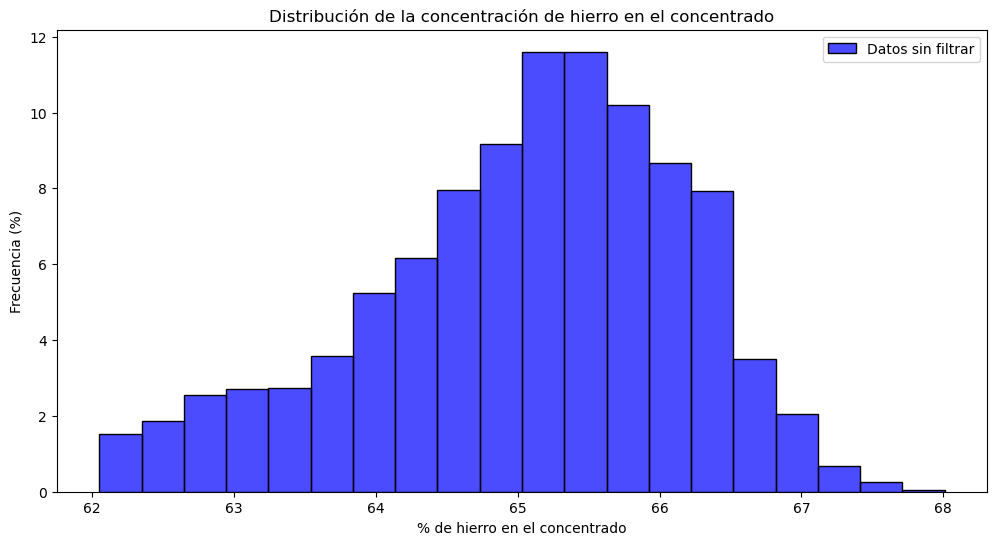

In [63]:
# GRafica de la concentración de hierro en el concentrado
plt.figure(figsize=(12, 6))
sns.histplot(data=data_01, x="% Iron Concentrate",bins=sturges(data_01["% Iron Concentrate"]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Datos sin filtrar")
plt.legend()
plt.xlabel("% de hierro en el concentrado")
plt.ylabel("Frecuencia (%)")
plt.title("Distribución de la concentración de hierro en el concentrado")
plt.show()

In [64]:
analisis_clases=data_01.copy()
def clasificador(dataFrame):
    if dataFrame["% Iron Concentrate"]>67:
        return "Muy Alta"
    elif dataFrame["% Iron Concentrate"]>65:
        return "Alta"
    elif dataFrame["% Iron Concentrate"]<62:
        return "Baja"
    else:
        return "Media"
analisis_clases["Clase"]=analisis_clases.apply(clasificador,axis=1)
print(analisis_clases["Clase"].value_counts())
# del data_filtrado_1
# del data_filtrado_2




Clase
Alta        410059
Media       315874
Muy Alta     11520
Name: count, dtype: int64


In [65]:
data_Alta=analisis_clases[analisis_clases["Clase"]=="Alta"]
data_Media=analisis_clases[analisis_clases["Clase"]=="Media"]
data_Muy_Alta=analisis_clases[analisis_clases["Clase"]=="Muy Alta"]
corte=62
data_Media_Corte=data_Media[data_Media["% Iron Feed"]<corte]
data_Alta_Corte=data_Alta[data_Alta["% Iron Feed"]<corte]
data_Muy_Alta_Corte=data_Muy_Alta[data_Muy_Alta["% Iron Feed"]<corte]


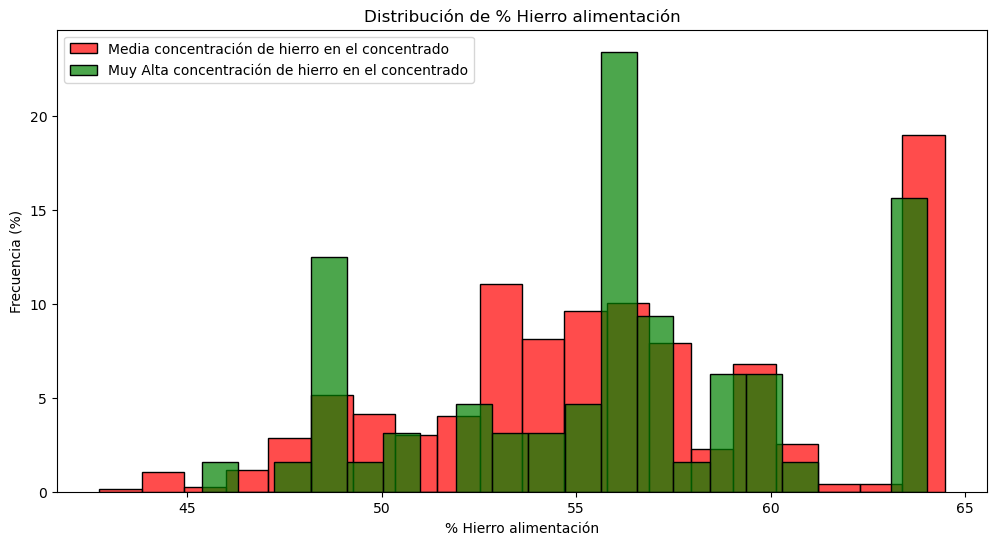

In [66]:
data="% Iron Feed"
plt.figure(figsize=(12, 6))
# sns.histplot(data=data_Alta, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Media, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

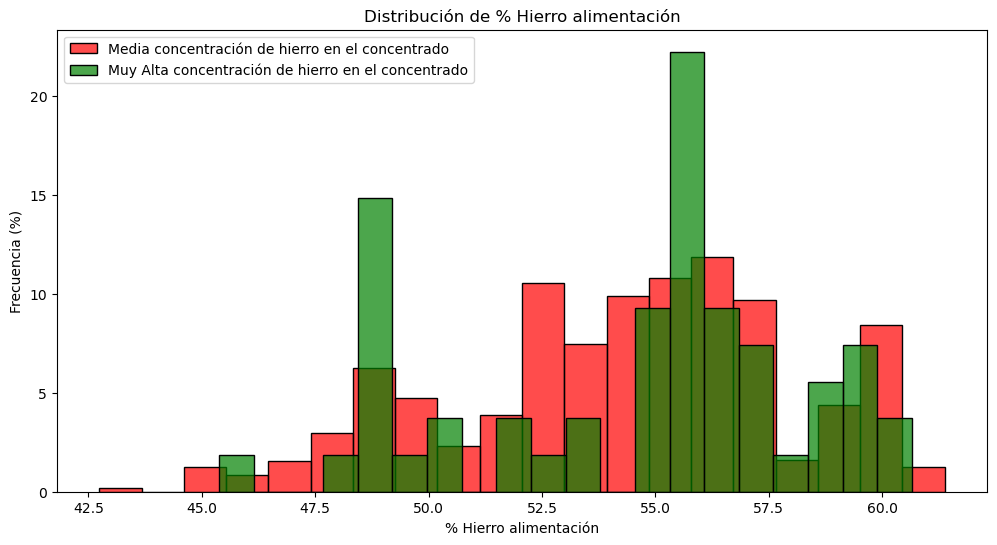

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_Media_Corte, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
# sns.histplot(data=data_Alta_Corte, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.5, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta_Corte, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

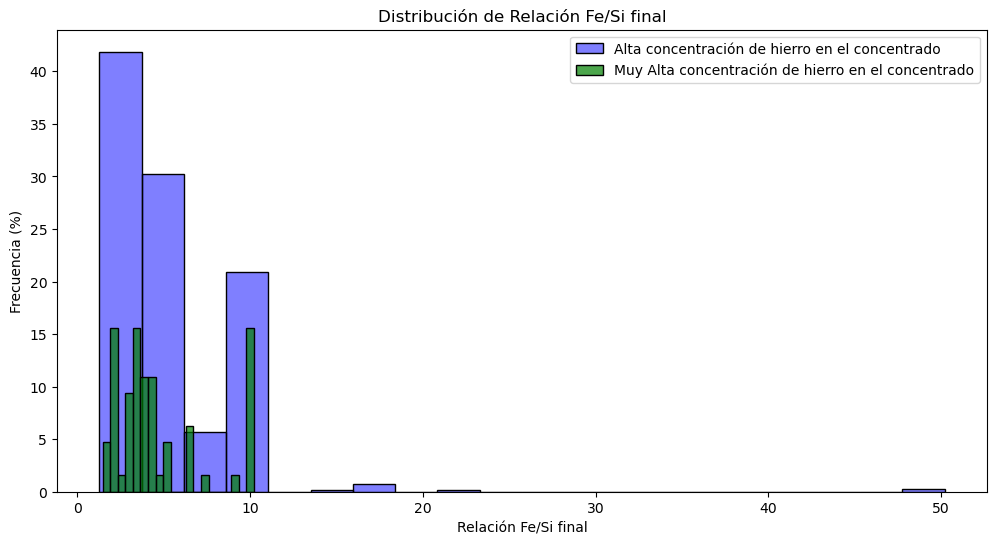

In [71]:
data="FeSi_inicial"
plt.figure(figsize=(12, 6))
# sns.histplot(data=data_Media, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
sns.histplot(data=data_Alta, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.5, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

In [76]:
print(data_Muy_Alta.describe())
espacios()
print(data_Alta.describe())
espacios()
print(data_Media.describe())
espacios()
with pd.ExcelWriter("Resumen_datos.xlsx") as writer:
    # Guardar cada DataFrame en una hoja separada
    data_Muy_Alta.describe().to_excel(writer, sheet_name="Muy_Alta")
    data_Alta.describe().to_excel(writer, sheet_name="Alta")
    data_Media.describe().to_excel(writer, sheet_name="Media")
    data_Muy_Alta_Corte.describe().to_excel(writer, sheet_name="Muy_Alta_Corte")
    data_Alta_Corte.describe().to_excel(writer, sheet_name="Alta_Corte")
    data_Media_Corte.describe().to_excel(writer, sheet_name="Media_Corte")

        % Iron Feed  % Silica Feed  Starch Flow m3/h  Amina Flow m3/h  \
count  11520.000000   11520.000000      11520.000000     11520.000000   
mean      56.102031      15.360625       3323.852492       464.939974   
std        4.891224       6.531908       1181.149935        85.615342   
min       45.380000       6.260000          0.857060       247.070000   
25%       53.140000      10.705000       2512.712050       398.187000   
50%       56.000000      15.030000       3485.285000       475.445000   
75%       59.087500      18.640000       4105.170000       521.353000   
max       64.030000      30.900000       6250.000000       738.766000   

       Ore Pulp Mass Flow Ton/h   Ore Pulp pH  Ore Pulp Density kg/L  \
count              11520.000000  11520.000000           11520.000000   
mean                 397.576319      9.900882               1.700086   
std                    9.159090      0.334762               0.063048   
min                  376.259000      8.753470         